# UTXO Ledgers: Exercise 5 - Sextortion Analysis

In this demo we will investigate Bitcoin addresses that received money from Sextortion Spam victims. The data from this demo is taken from our study [Spams meet Cryptocurrencies: Sextortion in the Bitcoin Ecosystem](https://arxiv.org/abs/1908.01051) and is a subset of [all the 12,533 Bitcoin addresses](https://github.com/MatteoRomiti/Sextortion_Spam_Bitcoin) we have collected from 4,340,736 sextortion spam emails.

The data for this demo is available in `./data/sextortion_addresses.json`

We are going to answer the following questions:

* Q1: How many USD did the input addresses receive in total?

* Q2: To how many entities can we map these addresses?

* Q3: How many addresses are controlled by these entities?

* Q4: How many USD did the corresponding entities receive in total?

* Q5: Where did the money come from, and where did it go to?

## Preparations

First, we install the graphsense-python package as described in the [README](https://github.com/graphsense/graphsense-python/blob/develop/README.md) of this repository. Import the package and configure the API endpoint. An API key for the public GraphSense demo API can be requested by sending an email to contact@iknaio.com.

In [1]:
import graphsense
from graphsense.api import bulk_api, general_api

import json
import pandas as pd

from pprint import pprint

In [2]:
f = open('config.json')
config = json.load(f)
f.close()
config

{'graphsense': {'host': 'https://api.ikna.io/',
  'api_key': 'PyTlTKIuo9CrTLR6VjlJRB5Tr22prmmI'}}

In [3]:
configuration = graphsense.Configuration(
    host = config['graphsense']['host'],
    api_key = {'api_key': config['graphsense']['api_key']})

In [4]:
CURRENCY = 'btc'

We can test whether or client works, by checking what data the GraphSense endpoint provides

In [5]:
with graphsense.ApiClient(configuration) as api_client:
    api_instance = general_api.GeneralApi(api_client)
    api_response = api_instance.get_statistics()
    pprint(api_response)

{'currencies': [{'name': 'btc',
                 'no_address_relations': 6130165038,
                 'no_addresses': 965532532,
                 'no_blocks': 732355,
                 'no_entities': 441173417,
                 'no_labels': 1069,
                 'no_tagged_addresses': 156062908,
                 'no_txs': 726448123,
                 'timestamp': 1650239875},
                {'name': 'bch',
                 'no_address_relations': 2177670078,
                 'no_addresses': 329163172,
                 'no_blocks': 734148,
                 'no_entities': 149786318,
                 'no_labels': 9,
                 'no_tagged_addresses': 307782,
                 'no_txs': 355677567,
                 'timestamp': 1648942357},
                {'name': 'ltc',
                 'no_address_relations': 1204027150,
                 'no_addresses': 131228194,
                 'no_blocks': 2238818,
                 'no_entities': 56664129,
                 'no_labels': 23,
      

Now we load the provided sample Bitcoin addresses


In [6]:
addressDF = pd.read_json('./data/sextortion_addresses.json')
addressDF.columns = ['address']
addressDF

,address
0,1JwRp2J8bQcoG8XTUbxQZaEj9QB4RB6zEa
1,1EZS92K4xJbymDLwG4F7PNF5idPE62e9XY
2,16B4HuSAJ4WRdCq7dzA5b4ASh6QQ7ytZWB
3,1EdX5vtBiHGmkqbJc7VRSuVMx9Kpgh53Tp
4,3Ch7RPfwkJ3wHhiBfA4CNc8SagGdjbZwVs
...,...
240,1BC1pvPUQF9QHg73ha4AEAhaoEvg6HmTbS
241,13QKq8RsvbJnLRbi5ZcVX1ziYW83tqvp1q
242,1DiEqE5R1Ktu7QCLUuJN31PNtpoBU41x2E
243,1NWybUp8ZJXKyDg2DR5MaePspforMPYbM3


# Q1. How many USD (US dollars) did the input addresses receive in total?

GraphSenes supports several asset types: Bitcoin (BTC), Bitcoin Cash (BCH), Litecoin (LTC), ZCash (ZEC).

We are investigating Bitcoin transactions, therefore we set the default currency to Bitcoin **BTC**.

In [7]:
with graphsense.ApiClient(configuration) as api_client:
    api_instance = bulk_api.BulkApi(api_client)

    operation = "get_address"
    body = {'address': addressDF['address'].to_list()}

    try:
        respAddrDF = pd.read_csv(
            api_instance.bulk_csv(CURRENCY, operation, body=body,
                                  num_pages=1, _preload_content=False))
    except graphsense.ApiException as e:
        print("Exception when calling BulkApi->bulk_csv: %s\n" % e)

In [8]:
respAddrDF

,_error,_info,_request_address,address,balance_eur,balance_usd,balance_value,entity,first_tx_height,first_tx_timestamp,...,no_incoming_txs,no_outgoing_txs,out_degree,tags,total_received_eur,total_received_usd,total_received_value,total_spent_eur,total_spent_usd,total_spent_value
0,NaN,NaN,1G93wR2LDzd2euJ92ePbMGzZ2zpyDRWU4G,1G93wR2LDzd2euJ92ePbMGzZ2zpyDRWU4G,0.0,0.00,0,430255405,545802,1539575313,...,11,2,2,NaN,3491.39,4025.40,69805745,3535.81,4047.87,69805745
1,NaN,NaN,1QCoDAaqBXpkuDyR7M4uUdq2Rctpisp2Q7,1QCoDAaqBXpkuDyR7M4uUdq2Rctpisp2Q7,0.0,0.00,0,449332788,547938,1540884495,...,1,1,1,NaN,794.93,901.69,14350000,469.71,534.54,14350000
2,NaN,NaN,1LTtPpCBNeUYsF8Jt7pHSmYRvkATuzeXFU,1LTtPpCBNeUYsF8Jt7pHSmYRvkATuzeXFU,0.0,0.00,0,439326392,545170,1539178717,...,1,1,2,NaN,403.48,465.10,7100000,399.28,462.45,7100000
3,NaN,NaN,1GGhxKFqxvgdB6Qnqx9xhY9ZkpwMJ6mkR1,1GGhxKFqxvgdB6Qnqx9xhY9ZkpwMJ6mkR1,0.0,0.00,0,446281042,549146,1541598664,...,1,1,2,NaN,713.43,815.52,12507839,620.85,703.05,12507839
4,NaN,NaN,1cGgSTTGBFbpjNXtXcWXYipALEDj8xSEC,1cGgSTTGBFbpjNXtXcWXYipALEDj8xSEC,0.0,0.00,0,475357463,561627,1549357799,...,3,1,1,NaN,888.70,1008.02,29770000,1019.46,1155.91,29770000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,NaN,NaN,16yJ7MQWTFNjsSvAJJMkjPpnJbAsGLYhW7,16yJ7MQWTFNjsSvAJJMkjPpnJbAsGLYhW7,0.0,0.00,0,429576138,541786,1537183993,...,12,2,3,NaN,2818.25,3290.36,52050832,2829.87,3323.43,52050832
241,NaN,NaN,3Jy5Ag9WYya7XD7aVwmRnpcrkehqnFhp5G,3Jy5Ag9WYya7XD7aVwmRnpcrkehqnFhp5G,0.0,0.00,0,134568893,528393,1529514862,...,20,19,443,NaN,6687.99,7629.48,128367789,6557.21,7475.96,128367789
242,NaN,NaN,1GR7rJfntdcbfhKT1s33RDby4z5ex1ou4Z,1GR7rJfntdcbfhKT1s33RDby4z5ex1ou4Z,0.0,0.00,0,453631000,551269,1543029124,...,14,3,3,NaN,6904.71,7826.02,202969814,6774.96,7664.12,202969814
243,NaN,NaN,18vVjgfyC6sbLEEJvYHTXoWeuupZDtqyNs,18vVjgfyC6sbLEEJvYHTXoWeuupZDtqyNs,0.0,0.00,0,467333820,557944,1547136391,...,1,1,2,NaN,807.69,928.70,25308000,878.76,996.21,25308000


In [9]:
print(f"{len(respAddrDF)} addresses received {sum(respAddrDF['total_received_usd']):.2f} USD")

245 addresses received 882341.52 USD


# Q2: To how many entities can we map these addresses?

In [10]:
print(f"They map to {len(respAddrDF['entity'].drop_duplicates())} distinct entities")

They map to 96 distinct entities


# Q3: How many addresses are controlled by these entities?

We now fetch summary statistics for each entity.

In [11]:
with graphsense.ApiClient(configuration) as api_client:
    api_instance = bulk_api.BulkApi(api_client)

    operation = "get_entity"
    body = {'entity': respAddrDF['entity'].drop_duplicates().to_list()}

    try:
        respEntityDF = pd.read_csv(
            api_instance.bulk_csv(CURRENCY, operation, body=body,
                                  num_pages=1, _preload_content=False))
    except graphsense.ApiException as e:
        print("Exception when calling BulkApi->bulk_csv: %s\n" % e)

In [12]:
respEntityDF

,_error,_info,_request_entity,balance_eur,balance_usd,balance_value,entity,first_tx_height,first_tx_timestamp,first_tx_tx_hash,...,no_outgoing_txs,out_degree,root_address,tags,total_received_eur,total_received_usd,total_received_value,total_spent_eur,total_spent_usd,total_spent_value
0,NaN,NaN,463565677,0.00,0.00,0,463565677,555912,1546005194,f5dc1c4beae86f2df66bd48fbd3d31a4b8d51cce2c3be2...,...,2,2,1e8o68StxCFLr6wdwKBrBqMQZc1VbFVMk,NaN,905.84,1042.28,26111818,905.85,1042.28,26111818
1,NaN,NaN,428558757,0.00,0.00,0,428558757,540217,1536249145,78bf3b72a5f852db2d29b16ef7f397cea88004f0fde9c9...,...,1,1,1MBYJ3cAzN7wdxNVrwHK88ddXXpHdA9gvz,NaN,24784.42,28909.84,453356554,33263.45,37127.07,453356554
2,NaN,NaN,435216677,0.00,0.00,0,435216677,543361,1538090522,7955b1c083d1179999a43eef40688ee21d4533a344fda9...,...,4,8,16e6KPCPGy5RNAmsBFKKChe91PcjgLDN6o,NaN,5951.80,6747.33,180288339,5956.51,6746.07,180288339
3,NaN,NaN,469872359,0.00,0.00,0,469872359,559062,1547836661,ccb8a353153390b36a7693de352f2d4cc72b5ce1c3837e...,...,2,3,1BCGDtVZPqBMZWm5FdFe1RVgCGku17LZgb,NaN,1136.88,1292.27,36004669,1135.95,1291.46,36004669
4,NaN,NaN,430255405,0.00,0.00,0,430255405,541072,1536746000,a075a0479f029f5f3138266a78587c3aa645db162b0d73...,...,7,7,1CXup5BRrEFuBHDeQcduCvfu3P48rXHrck,NaN,90204.64,105101.26,1618005845,89142.97,103660.50,1618005845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,NaN,NaN,466358730,0.00,0.00,0,466358730,557462,1546876679,9d1e49fb185928ccac78b10ef33c587281e79ce4762bf5...,...,1,1,1UKR6XVqWCfS7jLDjijxKapU3UX6U3Nh6,NaN,1907.15,2192.07,55604968,1756.99,2004.08,55604968
92,NaN,NaN,421412157,0.00,0.00,0,421412157,536677,1534216501,492ffb9631e96835401c74754f57fa32e98c0c60f44b5a...,...,6,9,1FG7huiM8Jq8JdpULfvVDCHThZqVeKB96q,NaN,1223.86,1412.68,22014944,1221.39,1409.70,22014944
93,NaN,NaN,480340955,0.00,0.00,0,480340955,563885,1550664741,e7a88933d03f2935918e8ec35858e502209acaa2f7bfef...,...,2,2,1L47wHe7FXWQ6pfPTbnykdX44FxQGstFeS,NaN,1228.31,1393.12,35484506,1228.31,1393.12,35484506
94,NaN,NaN,480505216,0.00,0.00,0,480505216,563938,1550697809,57cd2bf13111f8860799df6c847929eb5d12bf1aff85fe...,...,1,1,1QFNFoWpvmxLywMFcaHT3QmwvnKHpWWgyF,NaN,662.16,751.26,18891083,662.16,751.26,18891083


In [13]:
print(f"These {len(respEntityDF)} entities control {sum(respEntityDF['no_addresses'])} addresses")

These 96 entities control 1985532 addresses


Let's investigate these entities a bit deeper.

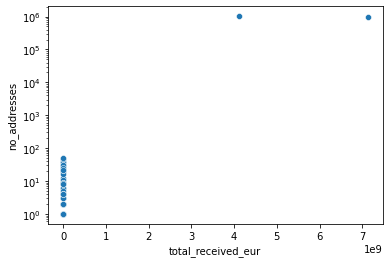

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

p = sns.scatterplot(data=respEntityDF, x="total_received_eur", y="no_addresses")
p.set(yscale="log")
plt.show(p)

We can assume that entities that received large funds and control a very large number of addresses are services (e.g., exchanges) or super-clusters. Therefore, for our further analysis, we filter our entities by **ignoring entities with more than 10K address**.

In [15]:
respEntityDFfiltered = respEntityDF[respEntityDF['no_addresses'] < 10e3]
respEntityDFfiltered

,_error,_info,_request_entity,balance_eur,balance_usd,balance_value,entity,first_tx_height,first_tx_timestamp,first_tx_tx_hash,...,no_outgoing_txs,out_degree,root_address,tags,total_received_eur,total_received_usd,total_received_value,total_spent_eur,total_spent_usd,total_spent_value
0,NaN,NaN,463565677,0.00,0.00,0,463565677,555912,1546005194,f5dc1c4beae86f2df66bd48fbd3d31a4b8d51cce2c3be2...,...,2,2,1e8o68StxCFLr6wdwKBrBqMQZc1VbFVMk,NaN,905.84,1042.28,26111818,905.85,1042.28,26111818
1,NaN,NaN,428558757,0.00,0.00,0,428558757,540217,1536249145,78bf3b72a5f852db2d29b16ef7f397cea88004f0fde9c9...,...,1,1,1MBYJ3cAzN7wdxNVrwHK88ddXXpHdA9gvz,NaN,24784.42,28909.84,453356554,33263.45,37127.07,453356554
2,NaN,NaN,435216677,0.00,0.00,0,435216677,543361,1538090522,7955b1c083d1179999a43eef40688ee21d4533a344fda9...,...,4,8,16e6KPCPGy5RNAmsBFKKChe91PcjgLDN6o,NaN,5951.80,6747.33,180288339,5956.51,6746.07,180288339
3,NaN,NaN,469872359,0.00,0.00,0,469872359,559062,1547836661,ccb8a353153390b36a7693de352f2d4cc72b5ce1c3837e...,...,2,3,1BCGDtVZPqBMZWm5FdFe1RVgCGku17LZgb,NaN,1136.88,1292.27,36004669,1135.95,1291.46,36004669
4,NaN,NaN,430255405,0.00,0.00,0,430255405,541072,1536746000,a075a0479f029f5f3138266a78587c3aa645db162b0d73...,...,7,7,1CXup5BRrEFuBHDeQcduCvfu3P48rXHrck,NaN,90204.64,105101.26,1618005845,89142.97,103660.50,1618005845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,NaN,NaN,466358730,0.00,0.00,0,466358730,557462,1546876679,9d1e49fb185928ccac78b10ef33c587281e79ce4762bf5...,...,1,1,1UKR6XVqWCfS7jLDjijxKapU3UX6U3Nh6,NaN,1907.15,2192.07,55604968,1756.99,2004.08,55604968
92,NaN,NaN,421412157,0.00,0.00,0,421412157,536677,1534216501,492ffb9631e96835401c74754f57fa32e98c0c60f44b5a...,...,6,9,1FG7huiM8Jq8JdpULfvVDCHThZqVeKB96q,NaN,1223.86,1412.68,22014944,1221.39,1409.70,22014944
93,NaN,NaN,480340955,0.00,0.00,0,480340955,563885,1550664741,e7a88933d03f2935918e8ec35858e502209acaa2f7bfef...,...,2,2,1L47wHe7FXWQ6pfPTbnykdX44FxQGstFeS,NaN,1228.31,1393.12,35484506,1228.31,1393.12,35484506
94,NaN,NaN,480505216,0.00,0.00,0,480505216,563938,1550697809,57cd2bf13111f8860799df6c847929eb5d12bf1aff85fe...,...,1,1,1QFNFoWpvmxLywMFcaHT3QmwvnKHpWWgyF,NaN,662.16,751.26,18891083,662.16,751.26,18891083


# Q4: How many USD did the corresponding entities receive in total?

In [16]:
print(f"{len(respEntityDFfiltered)} entities, which control {sum(respEntityDFfiltered['no_addresses'])} addresses, " +
      f"received {sum(respEntityDFfiltered['total_received_usd']):.2f} USD")

94 entities, which control 562 addresses, received 1506243.65 USD


# Q5: Where did the money come from, where did it go to?

For all filtered entities - we denote them as focus entities - we now gather all sending and receiving entities.

In [17]:
with graphsense.ApiClient(configuration) as api_client:
    api_instance = bulk_api.BulkApi(api_client)

    CURRENCY = "btc"
    operation = "list_entity_neighbors"
    body = {'entity': respEntityDFfiltered['entity'].to_list(),
            'direction': 'in',
            'include_labels': True}

    try:
        sendingEntitiesDF = pd.read_csv(api_instance.bulk_csv(CURRENCY, operation, body=body,
                                        num_pages=2,
                                        _preload_content=False))
    except graphsense.ApiException as e:
        print("Exception when calling BulkApi->bulk_csv: %s\n" % e)

In [18]:
sendingEntitiesDF

,_error,_info,_request_entity,balance_eur,balance_usd,balance_value,id,labels,labels_count,no_txs,node_type,received_eur,received_usd,received_value,value_eur,value_usd,value_value
0,NaN,NaN,468708086,8372772.9,9052556.72,22440924447,456855414,NaN,0,1,entity,4.299032e+09,5.000456e+09,25761038622678,597.20,681.18,18900000
1,NaN,NaN,468708086,0.0,0.00,0,466771700,NaN,0,1,entity,2.495880e+03,2.841910e+03,77874500,3.51,3.99,110000
2,NaN,NaN,468708086,0.0,0.00,0,468685343,NaN,0,1,entity,1.544750e+03,1.761980e+03,48887877,614.74,701.19,19455173
3,NaN,NaN,468708086,0.0,0.00,0,469225217,NaN,0,1,entity,1.592900e+02,1.815100e+02,5000000,101.33,115.46,3180600
4,NaN,NaN,468708086,0.0,0.00,0,469261319,NaN,0,1,entity,7.050900e+02,8.034600e+02,22132400,695.46,792.50,21830372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,NaN,NaN,429576138,0.0,0.00,0,441560732,NaN,0,1,entity,1.909900e+03,2.196400e+03,33714829,263.42,302.93,4650000
2633,NaN,NaN,429576138,0.0,0.00,0,444312183,NaN,0,1,entity,5.343909e+04,6.098264e+04,947381010,5.64,6.44,100000
2634,NaN,NaN,429576138,0.0,0.00,0,446791077,NaN,0,1,entity,7.651460e+03,8.712660e+03,136800996,133.59,152.12,2388509
2635,NaN,NaN,429576138,0.0,0.00,0,446811273,NaN,0,1,entity,7.193640e+03,8.191340e+03,128615589,33.22,37.82,595961


Our foucus entities also transfer funds among themselves. We remove them because we are interested in (known) other parties.

In [19]:
sendingEntitiesDF_filtered = sendingEntitiesDF[~sendingEntitiesDF['id'].isin(sendingEntitiesDF['_request_entity'])]
sendingEntitiesDF_filtered = sendingEntitiesDF_filtered[
    sendingEntitiesDF_filtered['labels'].notna()].reset_index(drop=True)
sendingEntitiesDF_filtered

,_error,_info,_request_entity,balance_eur,balance_usd,balance_value,id,labels,labels_count,no_txs,node_type,received_eur,received_usd,received_value,value_eur,value_usd,value_value
0,NaN,NaN,473988569,3.212567e+06,3.473395e+06,8610406609,72009786,cryptopay.me,1,1,entity,5.028229e+08,5.783679e+08,15265622699935,905.09,1037.01,29900000
1,NaN,NaN,462065618,1.224211e+07,1.323604e+07,32811610227,59774322,bitstamp.net,1,1,entity,3.511235e+10,4.069553e+10,1166887024789997,630.60,719.61,18822900
2,NaN,NaN,462065618,1.291517e+04,1.396375e+04,34615578,288813908,binance.com,1,1,entity,2.506567e+11,2.961397e+11,1575048462963838,696.32,791.59,19850000
3,NaN,NaN,464369779,6.884207e+08,7.443135e+08,1845123232354,45964491,huobi.com,1,1,entity,1.288749e+11,1.499639e+11,2375716832775597,515.05,584.08,14819700
4,NaN,NaN,440390219,1.224211e+07,1.323604e+07,32811610227,59774322,bitstamp.net,1,1,entity,3.511235e+10,4.069553e+10,1166887024789997,744.75,844.77,13444201
5,NaN,NaN,440390219,3.212567e+06,3.473395e+06,8610406609,72009786,cryptopay.me,1,1,entity,5.028229e+08,5.783679e+08,15265622699935,960.67,1089.68,17341873
6,NaN,NaN,479358148,5.500000e+00,5.950000e+00,14738,2407547,therocktrading.com,1,1,entity,2.358903e+08,2.760771e+08,8024515823410,285.04,322.11,8300000
7,NaN,NaN,479358148,1.146935e+04,1.240054e+04,30740446,19696854,bitcoin.de,1,1,entity,2.950590e+09,3.455805e+09,70038745613720,446.45,504.50,13000000
8,NaN,NaN,479358148,6.884207e+08,7.443135e+08,1845123232354,45964491,huobi.com,1,1,entity,1.288749e+11,1.499639e+11,2375716832775597,694.40,787.20,21090000
9,NaN,NaN,479358148,1.224211e+07,1.323604e+07,32811610227,59774322,bitstamp.net,1,4,entity,3.511235e+10,4.069553e+10,1166887024789997,2448.26,2780.24,72299086


In [20]:
print(f"Our focus entities received funds from {len(sendingEntitiesDF_filtered)} other known entities")

Our focus entities received funds from 36 other known entities


The above entities primarily represent custodial wallets hosted by major cryptoasset exchanges. They were most likely used to transfer by extortion victims to transfer funds to the perpetrators. Let's proceed and investigate the outgoing side.

In [21]:
with graphsense.ApiClient(configuration) as api_client:
    api_instance = bulk_api.BulkApi(api_client)

    CURRENCY = "btc"
    operation = "list_entity_neighbors"
    body = {'entity': respEntityDFfiltered['entity'].to_list(),
            'direction': 'out',
            'include_labels': True}

    try:
        receivingEntitiesDF = pd.read_csv(api_instance.bulk_csv(CURRENCY, operation, body=body,
                                        num_pages=2,
                                        _preload_content=False))
    except graphsense.ApiException as e:
        print("Exception when calling BulkApi->bulk_csv: %s\n" % e)

In [22]:
receivingEntitiesDF

,_error,_info,_request_entity,balance_eur,balance_usd,balance_value,id,labels,labels_count,no_txs,node_type,received_eur,received_usd,received_value,value_eur,value_usd,value_value
0,NaN,NaN,423390435,25454.78,27521.44,68224556,402248207,NaN,0,1,entity,1.007822e+09,1.167964e+09,18165706885416,250.47,287.80,4600000
1,NaN,NaN,423390435,0.00,0.00,0,423463715,NaN,0,1,entity,9.016000e+01,1.035900e+02,1655761,90.16,103.59,1655761
2,NaN,NaN,468708086,0.00,0.00,0,470438050,NaN,0,1,entity,3.304610e+03,3.756010e+03,105716916,3304.61,3756.01,105716916
3,NaN,NaN,480505216,316569.03,342271.21,848476587,447402797,NaN,0,1,entity,1.484803e+10,1.736080e+10,88650091817060,661.95,751.01,18884939
4,NaN,NaN,455701822,0.00,0.00,0,456423126,NaN,0,1,entity,7.934980e+03,9.009180e+03,233659710,7934.98,9009.18,233659710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,NaN,NaN,446227209,0.00,0.00,0,458439506,NaN,0,1,entity,2.356990e+03,2.675520e+03,77611056,2356.99,2675.52,77611056
357,NaN,NaN,446227209,0.00,0.00,0,459661545,NaN,0,1,entity,1.628500e+03,1.841590e+03,57125573,1628.50,1841.59,57125573
358,NaN,NaN,446227209,0.00,0.00,0,462315950,NaN,0,1,entity,1.752844e+04,1.992688e+04,499685904,17528.44,19926.88,499685904
359,NaN,NaN,446227209,0.00,0.00,0,466122247,NaN,0,1,entity,2.443320e+03,2.786700e+03,68248586,2443.32,2786.70,68248586


In [23]:
receivingEntitiesDF_filtered = receivingEntitiesDF[
    ~receivingEntitiesDF['id'].isin(receivingEntitiesDF['_request_entity'])]
receivingEntitiesDF_filtered = receivingEntitiesDF_filtered[
    receivingEntitiesDF_filtered['labels'].notna()].reset_index(drop=True)
receivingEntitiesDF_filtered

,_error,_info,_request_entity,balance_eur,balance_usd,balance_value,id,labels,labels_count,no_txs,node_type,received_eur,received_usd,received_value,value_eur,value_usd,value_value
0,NaN,NaN,478282212,46758.15,50554.43,125322413,424153801,coinpayments.net,1,1,entity,741956928.0,843247488.0,10564895226156,17.82,20.13,560325
1,NaN,NaN,462308836,77372.68,83654.55,207376272,56408267,cryptonator.com,1,1,entity,427678528.0,494715648.0,6404226047722,12.65,14.41,375750


The entities listed above received funds from the perpetrator. We could continue this investigation over several hops, but leave it for the moment.

## Network Visualization

Finally, we build and visualize a network showing the entities we just identified and collected.

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

### Entities sending money to sextortion addresses

In [25]:
g = nx.DiGraph()
for i, row in sendingEntitiesDF_filtered.iterrows():
    g.add_edge(row['id'], row['_request_entity'])
    g.add_node(row['id'], label=row['labels'])
    g.add_node(row['_request_entity'], label='sextortion')

In [26]:
print(f"Number of nodes: {g.number_of_nodes()}")
print(f"Number of edges: {g.number_of_edges()}")

Number of nodes: 35
Number of edges: 36


In [27]:
node_colours = []

for node_id, values in list(g.nodes(data=True)):
    if(values['label'] == 'sextortion'):
        node_colours.append('red')
    else:
        node_colours.append('green')

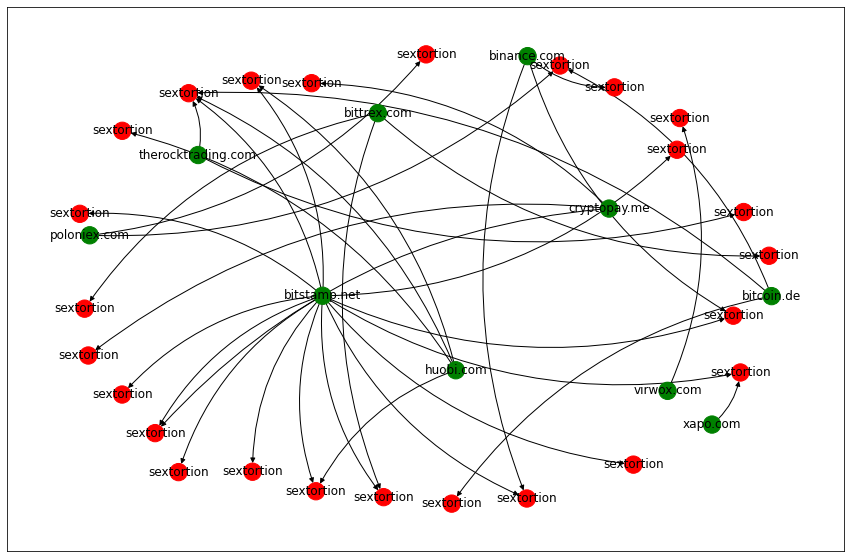

In [28]:
import math

pos = nx.spring_layout(g, k=10/math.sqrt(g.order()))

plt.figure(1, figsize=(15,10))

nx.draw_networkx_nodes(g, pos, node_color=node_colours)
node_labels = nx.get_node_attributes(g, 'label')
nx.draw_networkx_labels(g, pos, labels=node_labels)
nx.draw_networkx_edges(g, pos, connectionstyle="arc3,rad=0.2")
plt.show()


### Entities receiving money from sextortion addresses

In [29]:
g = nx.DiGraph()
for i, row in receivingEntitiesDF_filtered.iterrows():
    g.add_edge(row['_request_entity'], row['id'])
    g.add_node(row['id'], label=row['labels'])
    g.add_node(row['_request_entity'], label='sextortion')

In [30]:
print(f"Number of nodes: {g.number_of_nodes()}")
print(f"Number of edges: {g.number_of_edges()}")

Number of nodes: 4
Number of edges: 2


In [31]:
node_colours = []

for node_id, values in list(g.nodes(data=True)):
    if(values['label'] == 'sextortion'):
        node_colours.append('red')
    else:
        node_colours.append('green')

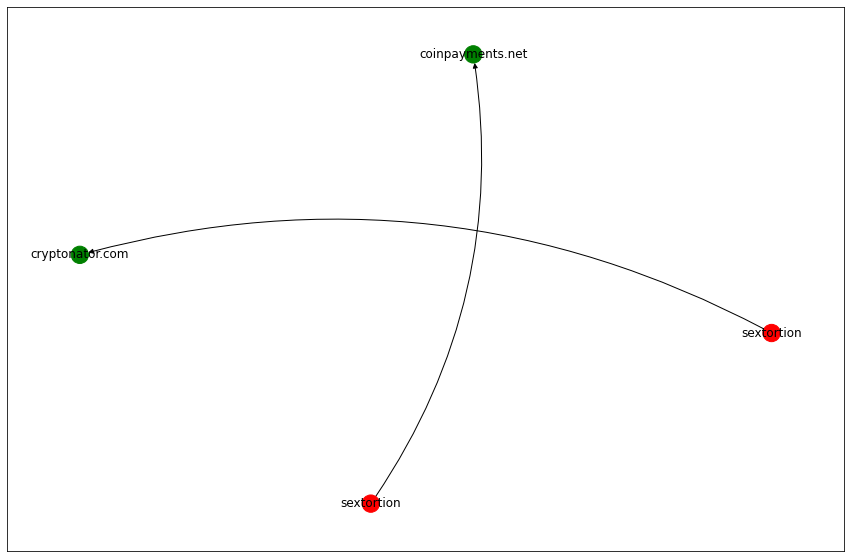

In [32]:
import math

pos = nx.spring_layout(g, k=10/math.sqrt(g.order()))

plt.figure(1, figsize=(15,10))

nx.draw_networkx_nodes(g, pos, node_color=node_colours)
node_labels = nx.get_node_attributes(g, 'label')
nx.draw_networkx_labels(g, pos, labels=node_labels)
nx.draw_networkx_edges(g, pos, connectionstyle="arc3,rad=0.2")
plt.show()